In [2]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from IPython.html.widgets import *
%matplotlib inline
import numpy as np
import util as my_util
import random
import pandas as pd 
fig = plt.figure()



/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

Tokens matrix: (1044, 30)
U shape: (1044, 1044)
S shape: (30,)
v shape: (30, 30)
r shape: (30, 3)


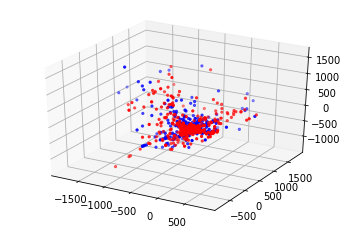

interactive(children=(IntSlider(value=2, description='n', max=29), Output()), _dom_classes=('widget-interact',…

<function __main__.energy_capture(n)>

In [7]:


# returns a dictionary where
# data['texts'] is a list of sentences
# data['tokens'] are the token 
# representation of data['texts']
data = my_util.load_data_dictionary()

# tokens:
# integers representing words
tokens = data['tokens']

print("Tokens matrix: " + str(tokens.shape))

# compute svd of tokens
u, s, v = np.linalg.svd(tokens, full_matrices=True)

sum_sigmas = sum(s)

print("U shape: " + str(u.shape))
print("S shape: " + str(s.shape))
print("v shape: " + str(v.shape))

r = v[:, [1, 2, 0]]

print("r shape: " + str(r.shape))


def energy_capture(n):
    
    # Energy Capture
    energy_captured = sum(s[:n+1] / sum_sigmas)
    
    
    # stairs plot
    plt.step(list(range(n+1)), s[:n+1] / sum_sigmas, color="g")
    plt.step(list(range(n, len(s))), s[n:] / sum_sigmas, color="b")
    plt.plot(n, s[n] / sum_sigmas, 'C0o', alpha=0.5)
    plt.ylabel('Energy Function')
    plt.xlabel('Energy Captured at n: ' + str(energy_captured))
    plt.show()

ax = plt.axes(projection='3d')

# map tokens into reduced space
data_t = np.matmul(tokens, r)

questions = data_t[::2]
answers = data_t[1::2]

data_t = data['tokens']

ax.scatter3D(questions[:, 0], questions[:, 1], questions[:, 2], c='r', marker='o', s=5, label="Questions")
ax.scatter3D(answers[:, 0], answers[:, 1], answers[:, 2], c='b', marker='o', s=5, label="Answers")

interact(energy_capture, n=widgets.IntSlider(min=0, max=len(s)-1, step=1, value=2))

Mean of word slots:
history name him data way this feel bad computers we robots don't i'm how how have that not that me me do what of a i a a

Median of word slots:
not me have your the


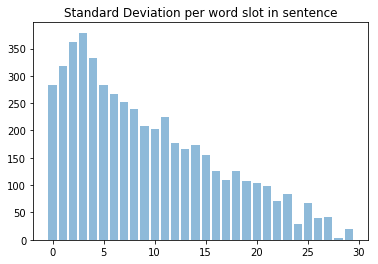

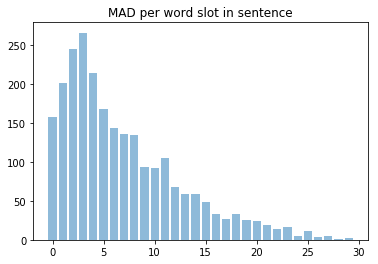

In [11]:
settings = my_util.loadSettings()
t = my_util.loadTokenizer(settings['tokenizer']['production'])

# load training data
# this does refit the tokenizer
(vocab, input_data, context, next_data_categorical) = my_util.load_and_process_data(settings['files']['training'], t)

# combine arrays for full rectangular data
tokens = np.append(input_data, context, axis=0)
tokens.shape

mean = np.mean(tokens, axis=0)
print('Mean of word slots:')
print(my_util.tokens_to_sentence(mean.astype(int), t))

mediam = np.median(tokens, axis=0)
print('\nMedian of word slots:')
print(my_util.tokens_to_sentence(mediam.astype(int), t))

# we are now going to check the variance of the tokens
standard_deviation = np.std(tokens, axis=0)

plt.bar(np.arange(30), standard_deviation, align='center', alpha=.5)

plt.title('Standard Deviation per word slot in sentence')

plt.show()

#mad_deviation = pd.Series(tokens).mad

df = pd.DataFrame(tokens)
mad_deviation = df.mad()

plt.bar(np.arange(30), mad_deviation, align='center', alpha=.5)

plt.title('MAD per word slot in sentence')

plt.show()